In [1]:
# Play with Beaching #

In [164]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import xarray as xr

from salishsea_tools import viz_tools

In [44]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
land = mesh.tmask[0, 0]
mesh

<xarray.Dataset>
Dimensions:       (t: 1, x: 398, y: 898, z: 40)
Dimensions without coordinates: t, x, y, z
Data variables: (12/43)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    time_counter  (t) datetime64[ns] ...
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    vmask         (t, z, y, x) int8 ...
    ...            ...
    gdepv         (t, z, y, x) float32 ...
    gdepw_0       (t, z, y, x) float32 ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
Attributes: (12/18)
    DOMAIN_number_total:     1
    DOMAIN_number:           0
    DOMAIN_dimensions_ids:   [1 2]
    DOMAIN_size_global:      [398 898]
    DOMAIN_size_local:       [398 898]
    DOMAIN_position_first:   [1 1]
    ...                      ...
    Conventions:             CF-1.6
    title:                   Salish Sea NEMO bathymetry_201702 Bathymetry Mes...
    institution:             Dept of Earth, Ocean & Atmospheric Sciences, Uni...
    source:                  NEMO-3.6 Salish Sea configuration
    references:              https://salishsea.eos.ubc.ca/erddap/info/\nhttps...
    history:                 [2019-03-14 15:00] ncks -4 -L4 -O mesh_mask.nc m...

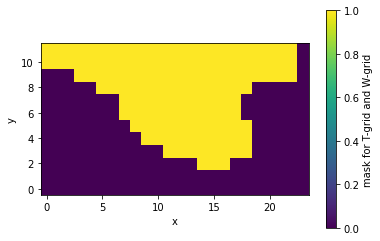

In [206]:
# Kits
imin, imax = 448, 460
jmin, jmax = 321, 345
fig, ax = plt.subplots(1, 1)
land[imin:imax, jmin:jmax].plot(ax=ax)
viz_tools.set_aspect(ax);
mymask = np.zeros_like(land)
mymask[imin:imax, jmin:jmax] = 1

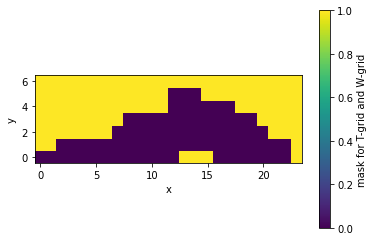

In [210]:
# Orcas
imin, imax = 320, 327
jmin, jmax = 284, 308
fig, ax = plt.subplots(1, 1)
land[imin:imax, jmin:jmax].plot(ax=ax)
viz_tools.set_aspect(ax);
mymask = np.zeros_like(land)
mymask[imin:imax, jmin:jmax] = 1

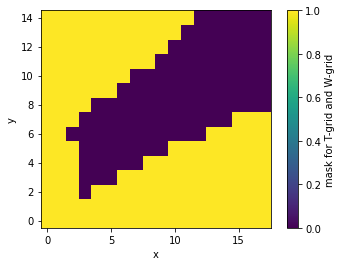

In [208]:
# Lummi
imin, imax = 305, 320
jmin, jmax = 337, 355
fig, ax = plt.subplots(1, 1)
land[imin:imax, jmin:jmax].plot(ax=ax)
viz_tools.set_aspect(ax);
mymask = np.zeros_like(land)
mymask[imin:imax, jmin:jmax] = 1

values = np.ma.masked_array(np.ones_like(land[imin:imax, jmin:jmax]), mask=1-land[imin:imax, jmin:jmax])

np.ma.notmasked_edges(values)

In [193]:
minoil = 5

In [212]:
colours = {'bunker': 'blue',
           'other': 'blue',
           'akns': 'navy',
           'diesel': 'skyblue',
           'gas': 'skyblue',
           'jet': 'skyblue',
           'dilbit': 'navy',
           }
colours['bunker']
data.OilType.item()

'dilbit'

In [176]:
month_colours = ['slateblue', 'slateblue', 'lawngreen', 'lawngreen', 'indianred', 'indianred',
                 'goldenrod', 'goldenrod', 'goldenrod', 'darkorchid', 'darkorchid', 'slateblue']

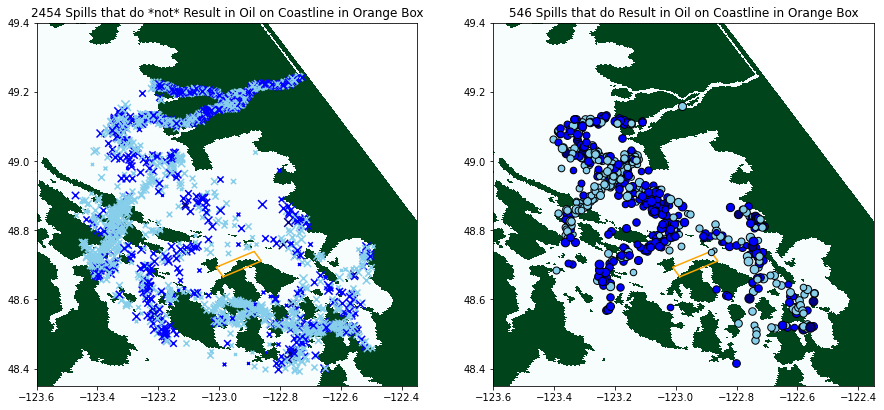

In [214]:
scale = 5
scount = 0
ncount = 0
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
for ax in axs:
    ax.pcolormesh(mesh.nav_lon, mesh.nav_lat, land[:-1,:-1], cmap='BuGn_r')
direct = Path('/data/sallen/results/MIDOSS/beaching_files/')
for file in direct.glob('*'):
    data = xr.open_dataset(file)
#    month = data.Spilldatetime.values.astype('datetime64[M]').astype(int) % 12
    if (np.ma.masked_array(data.Beaching_Volume, mask=data.Beaching_Volume < minoil/1000.) * 
        mymask[1:-1, 1:-1]).sum(axis=0).sum(axis=0) > 0 :
        
        axs[1].scatter(data.SpillLon, data.SpillLat, marker='o', c=colours[data.OilType.item()], 
                   s=np.log(1000*data.SpillVolume.item())*scale,
               edgecolors='k', zorder=3)
        scount = scount + 1
    else:
        axs[0].scatter(data.SpillLon, data.SpillLat, marker='x', c=colours[data.OilType.item()], 
                   s=np.log(1000*data.SpillVolume.item())*scale)
        ncount = ncount + 1
        
    data.close()
for ax in axs:
    ax.set_xlim(-123.6, -122.35)
    ax.set_ylim(48.35, 49.4)
    ax.plot([mesh.nav_lon[imin, jmin], mesh.nav_lon[imin, jmax], mesh.nav_lon[imax, jmax], 
             mesh.nav_lon[imax, jmin], mesh.nav_lon[imin, jmin]],
            [mesh.nav_lat[imin, jmin], mesh.nav_lat[imin, jmax], mesh.nav_lat[imax, jmax], 
             mesh.nav_lat[imax, jmin], mesh.nav_lat[imin, jmin]],
            color='orange')
    viz_tools.set_aspect(ax, coords='map');
axs[0].set_title(f'{ncount} Spills that do *not* Result in Oil on Coastline in Orange Box')
axs[1].set_title(f'{scount} Spills that do Result in Oil on Coastline in Orange Box');

In [37]:
data

<xarray.Dataset>
Dimensions:          (grid_x: 396, grid_y: 896)
Coordinates:
  * grid_y           (grid_y) int16 0 1 2 3 4 5 6 ... 890 891 892 893 894 895
  * grid_x           (grid_x) int16 0 1 2 3 4 5 6 ... 390 391 392 393 394 395
Data variables:
    Beaching_Volume  (grid_y, grid_x) float64 ...
    Beaching_Time    (grid_y, grid_x) datetime64[ns] ...
    OilType          object ...
    SpillVolume      float64 ...
    SpillLon         float64 ...
    SpillLat         float64 ...
    Spilldatetime    datetime64[ns] ...
Attributes:
    acknowledgements:      MOHID output
    creator_email:         sallen@eoas.ubc.ca
    creator_name:          Salish Sea MEOPAR Project Contributors
    creator_url:           https://ubc-moad-docs.readthedocs.org/
    institution:           UBC EOAS
    institution_fullname:  Earth, Ocean & Atmospheric Sciences, University of...
    summary:               Beaching Time and Volume from a Specific Run
    source:                analysis-susan/notebooks/MOHID/SaveBeaching.py
    history:               [2022-04-21] File creation.

In [171]:
mydate = data.Spilldatetime.values
mydate

numpy.datetime64('2017-07-04T09:30:00.000000000')

In [168]:
dt.datetime.fromtimestamp(mydate)

OSError: [Errno 75] Value too large for defined data type

In [175]:
data.Spilldatetime.values.astype('datetime64[M]').astype(int) % 12 + 1

7

In [173]:
months

1